#Libraries

In [ ]:
pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184112 sha256=b6ccaf8217068a7d10f545c1df69805f7f815c8a30a03635ed1c81efafff38a6
  Stored in directory: /root/.cache/pip/wheels/83/55/6b/552e083cf5509c0afe808b76cf434f1be284d01a112623bd37
Successfully built pyod


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation
from pyod.models.mad import MAD
from sklearn.neighbors import LocalOutlierFactor

#Dataset

In [ ]:
#csv_results_42_255441_mp-03-naamsestraat-62-taste
naamsestraat62 = pd.read_csv("/content/drive/MyDrive/Export 42 Noise Data /csv_results_42_255441_mp-03-naamsestraat-62-taste.csv")
#csv_results_42_255442_mp-05-calvariekapel-ku-leuven
calvariekapel = pd.read_csv("/content/drive/MyDrive/Export 42 Noise Data /csv_results_42_255442_mp-05-calvariekapel-ku-leuven.csv")
#csv_results_42_255443_mp-06-parkstraat-2-la-filosovia
paarkstraat2 = pd.read_csv("/content/drive/MyDrive/Export 42 Noise Data /csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv")
#csv_results_42_255444_mp-07-naamsestraat-81
naamsestraat81 = pd.read_csv("/content/drive/MyDrive/Export 42 Noise Data /csv_results_42_255444_mp-07-naamsestraat-81.csv")

In [ ]:
naamsestraat62.head()

,object_id,description,result_timestamp,lamax,lamax_unit,laeq,laeq_unit,lceq,lceq_unit,lcpeak,lcpeak_unit
0,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:00.349,87.6,dB(A),82.7,dB(A),83.61,dB(C),97.17,dB(C)
1,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:01.349,84.5,dB(A),83.1,dB(A),84.42,dB(C),96.41,dB(C)
2,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:02.349,84.8,dB(A),82.7,dB(A),84.19,dB(C),96.24,dB(C)
3,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:03.349,81.9,dB(A),79.3,dB(A),81.08,dB(C),94.03,dB(C)
4,255441,MP 03: Naamsestraat 62 Taste,01/01/2022 00:00:04.349,78.3,dB(A),76.0,dB(A),77.12,dB(C),89.81,dB(C)


#Missing Data

In [ ]:
naamsestraat62.shape

(2677683, 11)

In [ ]:
naamsestraat62.isna().sum()

object_id            0
description          0
result_timestamp     0
lamax                3
lamax_unit           3
laeq                 3
laeq_unit            3
lceq                12
lceq_unit           12
lcpeak              12
lcpeak_unit         12
dtype: int64

In [ ]:
naamsestraat62_clean = naamsestraat62.dropna()

In [ ]:
naamsestraat62_clean.shape

(2677668, 11)

In [ ]:
naamsestraat62_clean.isna().sum()

object_id           0
description         0
result_timestamp    0
lamax               0
lamax_unit          0
laeq                0
laeq_unit           0
lceq                0
lceq_unit           0
lcpeak              0
lcpeak_unit         0
dtype: int64

In [ ]:
calvariekapel.isna().sum()

object_id           0
description         0
result_timestamp    0
lamax               0
lamax_unit          0
laeq                0
laeq_unit           0
lceq                0
lceq_unit           0
lcpeak              0
lcpeak_unit         0
dtype: int64

In [ ]:
paarkstraat2.isna().sum()

object_id           0
description         0
result_timestamp    0
lamax               0
lamax_unit          0
laeq                0
laeq_unit           0
lceq                0
lceq_unit           0
lcpeak              0
lcpeak_unit         0
dtype: int64

In [ ]:
naamsestraat81.isna().sum()

object_id           0
description         0
result_timestamp    0
lamax               0
lamax_unit          0
laeq                0
laeq_unit           0
lceq                0
lceq_unit           0
lcpeak              0
lcpeak_unit         0
dtype: int64

#Summary Statistics

In [ ]:
def summarize_dataset(dataset):
    return round(dataset.describe(), 2)

In [ ]:
round(naamsestraat62.describe(), 2)

,object_id,lamax,laeq,lceq,lcpeak
count,2677683.0,2677680.00,2677680.00,2677671.00,2677671.00
mean,255441.0,53.24,51.73,61.53,73.15
std,0.0,6.58,6.43,6.00,5.94
min,255441.0,42.80,41.80,52.75,62.82
25%,255441.0,47.30,46.00,56.58,68.10
50%,255441.0,52.10,50.40,59.91,72.12
75%,255441.0,57.60,56.00,65.24,76.89
max,255441.0,104.10,100.50,99.97,120.59


In [ ]:
round(calvariekapel.describe(), 2)

,object_id,lamax,laeq,lceq,lcpeak
count,2678318.0,2678318.00,2678318.00,2678318.00,2678318.00
mean,255442.0,50.37,48.56,57.52,69.75
std,0.0,10.59,10.21,8.50,8.82
min,255442.0,32.30,31.80,43.99,53.83
25%,255442.0,41.50,39.90,50.38,62.26
50%,255442.0,50.60,48.00,55.95,69.07
75%,255442.0,58.00,56.00,63.44,75.72
max,255442.0,108.50,105.20,105.02,121.27


In [ ]:
round(paarkstraat2.describe(), 2)

,object_id,lamax,laeq,lceq,lcpeak
count,2630766.0,2630766.00,2630766.00,2630766.00,2630766.00
mean,255443.0,50.09,48.27,57.12,69.80
std,0.0,10.28,10.16,9.40,8.93
min,255443.0,33.00,32.00,41.75,53.59
25%,255443.0,40.90,39.10,48.87,61.40
50%,255443.0,51.00,48.40,56.14,69.27
75%,255443.0,57.70,56.10,64.07,76.66
max,255443.0,106.90,104.50,103.87,121.01


In [ ]:
round(naamsestraat81.describe(), 2)

,object_id,lamax,laeq,lceq,lcpeak
count,2678323.0,2678323.00,2678323.00,2678323.00,2678323.00
mean,255444.0,48.80,47.52,58.75,70.08
std,0.0,10.78,10.54,8.56,8.55
min,255444.0,32.00,31.30,45.41,55.26
25%,255444.0,39.00,38.00,51.04,62.39
50%,255444.0,48.30,46.80,57.29,69.03
75%,255444.0,57.10,55.60,64.74,76.19
max,255444.0,107.80,103.80,103.88,120.75


#Outlier Detection - IQR Criteria - Naamsestraat62

In [ ]:
def identify_outliers_IQR(dataset, column, factor=1.5):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (iqr * factor)
    upper_limit = q3 + (iqr * factor)
    is_lower = dataset[column] < lower_limit
    is_upper = dataset[column] > upper_limit
    outliers = dataset[is_lower | is_upper]
    lower_outliers = dataset[dataset[column] < lower_limit]
    upper_outliers = dataset[dataset[column] > upper_limit]
    print(f"Total number of outliers in {column}: {len(outliers)}")
    print(f"Number of lower outliers in {column}: {len(lower_outliers)}")
    print(f"Number of upper outliers in {column}: {len(upper_outliers)}")
    return outliers, lower_outliers, upper_outliers

In [ ]:
#my_outliers, my_lower_outliers, my_upper_outliers = identify_outliers(my_dataset, 'my_column', factor=2.0)

Naamsestraat62 - lamax

In [ ]:
q1_lamax_naamsestraat62 = naamsestraat62['lamax'].quantile(0.25)
q3_lamax_naamsestraat62 = naamsestraat62['lamax'].quantile(0.75)
iqr_lamax_naamsestraat62 = q3_lamax_naamsestraat62 - q1_lamax_naamsestraat62
factor = 1.5
lower_limit_lamax_naamsestraat62 = q1_lamax_naamsestraat62 - (iqr_lamax_naamsestraat62 * factor)
upper_limit_lamax_naamsestraat62 = q3_lamax_naamsestraat62 + (iqr_lamax_naamsestraat62 * factor)
is_lower_lamax_naamsestraat62 = naamsestraat62['lamax'] < lower_limit_lamax_naamsestraat62
is_upper_lamax_naamsestraat62 = naamsestraat62['lamax'] > upper_limit_lamax_naamsestraat62
outliers_lamax_naamsestraat62 = naamsestraat62[is_lower_lamax_naamsestraat62 | is_upper_lamax_naamsestraat62]
print(len(outliers_lamax_naamsestraat62))
lower_outliers_lamax_naamsestraat62 = naamsestraat62[naamsestraat62['lamax'] < lower_limit_lamax_naamsestraat62]
print(len(lower_outliers_lamax_naamsestraat62))
upper_outliers_lamax_naamsestraat62 = naamsestraat62[naamsestraat62['lamax'] > upper_limit_lamax_naamsestraat62]
print(len(upper_outliers_lamax_naamsestraat62))

13575
0
13575


Naamsestraat62 - laeq

In [ ]:
q1_laeq_naamsestraat62 = naamsestraat62['laeq'].quantile(0.25)
q3_laeq_naamsestraat62 = naamsestraat62['laeq'].quantile(0.75)
iqr_laeq_naamsestraat62 = q3_laeq_naamsestraat62 - q1_laeq_naamsestraat62
factor = 1.5
lower_limit_laeq_naamsestraat62 = q1_laeq_naamsestraat62 - (iqr_laeq_naamsestraat62 * factor)
upper_limit_laeq_naamsestraat62 = q3_laeq_naamsestraat62 + (iqr_laeq_naamsestraat62 * factor)
is_lower_laeq_naamsestraat62 = naamsestraat62['laeq'] < lower_limit_laeq_naamsestraat62
is_upper_laeq_naamsestraat62 = naamsestraat62['laeq'] > upper_limit_laeq_naamsestraat62
outliers_laeq_naamsestraat62 = naamsestraat62[is_lower_laeq_naamsestraat62 | is_upper_laeq_naamsestraat62]
print(len(outliers_laeq_naamsestraat62))
lower_outliers_laeq_naamsestraat62 = naamsestraat62[naamsestraat62['laeq'] < lower_limit_laeq_naamsestraat62]
print(len(lower_outliers_laeq_naamsestraat62))
upper_outliers_laeq_naamsestraat62 = naamsestraat62[naamsestraat62['laeq'] > upper_limit_laeq_naamsestraat62]
print(len(upper_outliers_laeq_naamsestraat62))

13746
0
13746


Naamsestraat62 - lceq

In [ ]:
q1_lceq_naamsestraat62 = naamsestraat62['lceq'].quantile(0.25)
q3_lceq_naamsestraat62 = naamsestraat62['lceq'].quantile(0.75)
iqr_lceq_naamsestraat62 = q3_lceq_naamsestraat62 - q1_lceq_naamsestraat62
factor = 1.5
lower_limit_lceq_naamsestraat62 = q1_lceq_naamsestraat62 - (iqr_lceq_naamsestraat62 * factor)
upper_limit_lceq_naamsestraat62 = q3_lceq_naamsestraat62 + (iqr_lceq_naamsestraat62 * factor)
is_lower_lceq_naamsestraat62 = naamsestraat62['lceq'] < lower_limit_lceq_naamsestraat62
is_upper_lceq_naamsestraat62 = naamsestraat62['lceq'] > upper_limit_lceq_naamsestraat62
outliers_lceq_naamsestraat62 = naamsestraat62[is_lower_lceq_naamsestraat62 | is_upper_lceq_naamsestraat62]
print(len(outliers_lceq_naamsestraat62))
lower_outliers_lceq_naamsestraat62 = naamsestraat62[naamsestraat62['lceq'] < lower_limit_lceq_naamsestraat62]
print(len(lower_outliers_lceq_naamsestraat62))
upper_outliers_lceq_naamsestraat62 = naamsestraat62[naamsestraat62['lceq'] > upper_limit_lceq_naamsestraat62]
print(len(upper_outliers_lceq_naamsestraat62))

35405
0
35405


Naamsestraat62 - lcpeak

In [ ]:
q1_lcpeak_naamsestraat62 = naamsestraat62['lcpeak'].quantile(0.25)
q3_lcpeak_naamsestraat62 = naamsestraat62['lcpeak'].quantile(0.75)
iqr_lcpeak_naamsestraat62 = q3_lcpeak_naamsestraat62 - q1_lcpeak_naamsestraat62
factor = 1.5
lower_limit_lcpeak_naamsestraat62 = q1_lcpeak_naamsestraat62 - (iqr_lcpeak_naamsestraat62 * factor)
upper_limit_lcpeak_naamsestraat62 = q3_lcpeak_naamsestraat62 + (iqr_lcpeak_naamsestraat62 * factor)
is_lower_lcpeak_naamsestraat62 = naamsestraat62['lcpeak'] < lower_limit_lcpeak_naamsestraat62
is_upper_lcpeak_naamsestraat62 = naamsestraat62['lcpeak'] > upper_limit_lcpeak_naamsestraat62
outliers_lcpeak_naamsestraat62 = naamsestraat62[is_lower_lcpeak_naamsestraat62 | is_upper_lcpeak_naamsestraat62]
print(len(outliers_lcpeak_naamsestraat62))
lower_outliers_lcpeak_naamsestraat62 = naamsestraat62[naamsestraat62['lcpeak'] < lower_limit_lcpeak_naamsestraat62]
print(len(lower_outliers_lcpeak_naamsestraat62))
upper_outliers_lcpeak_naamsestraat62 = naamsestraat62[naamsestraat62['lcpeak'] > upper_limit_lcpeak_naamsestraat62]
print(len(upper_outliers_lcpeak_naamsestraat62))

25916
0
25916


#Outlier Detection - IQR Criteria - Calvariekapel 

Calvariekapel - lamax

In [ ]:
q1_lamax_calvariekapel = calvariekapel['lamax'].quantile(0.25)
q3_lamax_calvariekapel = calvariekapel['lamax'].quantile(0.75)
iqr_lamax_calvariekapel = q3_lamax_calvariekapel - q1_lamax_calvariekapel
factor = 1.5
lower_limit_lamax_calvariekapel = q1_lamax_calvariekapel - (iqr_lamax_calvariekapel * factor)
upper_limit_lamax_calvariekapel = q3_lamax_calvariekapel + (iqr_lamax_calvariekapel * factor)
is_lower_lamax_calvariekapel = calvariekapel['lamax'] < lower_limit_lamax_calvariekapel
is_upper_lamax_calvariekapel = calvariekapel['lamax'] > upper_limit_lamax_calvariekapel
outliers_lamax_calvariekapel = calvariekapel[is_lower_lamax_calvariekapel | is_upper_lamax_calvariekapel]
print(len(outliers_lamax_calvariekapel))
lower_outliers_lamax_calvariekapel = calvariekapel[calvariekapel['lamax'] < lower_limit_lamax_calvariekapel]
print(len(lower_outliers_lamax_calvariekapel))
upper_outliers_lamax_calvariekapel = calvariekapel[calvariekapel['lamax'] > upper_limit_lamax_calvariekapel]
print(len(upper_outliers_lamax_calvariekapel))

1213
0
1213


Calvariekapel - laeq

In [ ]:
q1_laeq_calvariekapel = calvariekapel['laeq'].quantile(0.25)
q3_laeq_calvariekapel = calvariekapel['laeq'].quantile(0.75)
iqr_laeq_calvariekapel = q3_laeq_calvariekapel - q1_laeq_calvariekapel
factor = 1.5
lower_limit_laeq_calvariekapel = q1_laeq_calvariekapel - (iqr_laeq_calvariekapel * factor)
upper_limit_laeq_calvariekapel = q3_laeq_calvariekapel + (iqr_laeq_calvariekapel * factor)
is_lower_laeq_calvariekapel = calvariekapel['laeq'] < lower_limit_laeq_calvariekapel
is_upper_laeq_calvariekapel = calvariekapel['laeq'] > upper_limit_laeq_calvariekapel
outliers_laeq_calvariekapel = calvariekapel[is_lower_laeq_calvariekapel | is_upper_laeq_calvariekapel]
print(len(outliers_laeq_calvariekapel))
lower_outliers_laeq_calvariekapel = calvariekapel[calvariekapel['laeq'] < lower_limit_laeq_calvariekapel]
print(len(lower_outliers_laeq_calvariekapel))
upper_outliers_laeq_calvariekapel = calvariekapel[calvariekapel['laeq'] > upper_limit_laeq_calvariekapel]
print(len(upper_outliers_laeq_calvariekapel))

603
0
603


Calvariekapel - lceq

In [ ]:
q1_lceq_calvariekapel = calvariekapel['lceq'].quantile(0.25)
q3_lceq_calvariekapel = calvariekapel['lceq'].quantile(0.75)
iqr_lceq_calvariekapel = q3_lceq_calvariekapel - q1_lceq_calvariekapel
factor = 1.5
lower_limit_lceq_calvariekapel = q1_lceq_calvariekapel - (iqr_lceq_calvariekapel * factor)
upper_limit_lceq_calvariekapel = q3_lceq_calvariekapel + (iqr_lceq_calvariekapel * factor)
is_lower_lceq_calvariekapel = calvariekapel['lceq'] < lower_limit_lceq_calvariekapel
is_upper_lceq_calvariekapel = calvariekapel['lceq'] > upper_limit_lceq_calvariekapel
outliers_lceq_calvariekapel = calvariekapel[is_lower_lceq_calvariekapel | is_upper_lceq_calvariekapel]
print(len(outliers_lceq_calvariekapel))
lower_outliers_lceq_calvariekapel = calvariekapel[calvariekapel['lceq'] < lower_limit_lceq_calvariekapel]
print(len(lower_outliers_lceq_calvariekapel))
upper_outliers_lceq_calvariekapel = calvariekapel[calvariekapel['lceq'] > upper_limit_lceq_calvariekapel]
print(len(upper_outliers_lceq_calvariekapel))

8255
0
8255


Calvariekapel - lcpeak

In [ ]:
q1_lcpeak_calvariekapel = calvariekapel['lcpeak'].quantile(0.25)
q3_lcpeak_calvariekapel = calvariekapel['lcpeak'].quantile(0.75)
iqr_lcpeak_calvariekapel = q3_lcpeak_calvariekapel - q1_lcpeak_calvariekapel
factor = 1.5
lower_limit_lcpeak_calvariekapel = q1_lcpeak_calvariekapel - (iqr_lcpeak_calvariekapel * factor)
upper_limit_lcpeak_calvariekapel = q3_lcpeak_calvariekapel + (iqr_lcpeak_calvariekapel * factor)
is_lower_lcpeak_calvariekapel = calvariekapel['lcpeak'] < lower_limit_lcpeak_calvariekapel
is_upper_lcpeak_calvariekapel = calvariekapel['lcpeak'] > upper_limit_lcpeak_calvariekapel
outliers_lcpeak_calvariekapel = calvariekapel[is_lower_lcpeak_calvariekapel | is_upper_lcpeak_calvariekapel]
print(len(outliers_lcpeak_calvariekapel))
lower_outliers_lcpeak_calvariekapel = calvariekapel[calvariekapel['lcpeak'] < lower_limit_lcpeak_calvariekapel]
print(len(lower_outliers_lcpeak_calvariekapel))
upper_outliers_lcpeak_calvariekapel = calvariekapel[calvariekapel['lcpeak'] > upper_limit_lcpeak_calvariekapel]
print(len(upper_outliers_lcpeak_calvariekapel))

5585
0
5585


#Outlier Detection - IQR Criteria - Paarkstraat2

Paarkstraat2 - lamax

In [ ]:
q1_lamax_paarkstraat2 = paarkstraat2['lamax'].quantile(0.25)
q3_lamax_paarkstraat2 = paarkstraat2['lamax'].quantile(0.75)
iqr_lamax_paarkstraat2 = q3_lamax_paarkstraat2 - q1_lamax_paarkstraat2
factor = 1.5
lower_limit_lamax_paarkstraat2 = q1_lamax_paarkstraat2 - (iqr_lamax_paarkstraat2 * factor)
upper_limit_lamax_paarkstraat2 = q3_lamax_paarkstraat2 + (iqr_lamax_paarkstraat2 * factor)
is_lower_lamax_paarkstraat2 = paarkstraat2['lamax'] < lower_limit_lamax_paarkstraat2
is_upper_lamax_paarkstraat2 = paarkstraat2['lamax'] > upper_limit_lamax_paarkstraat2
outliers_lamax_paarkstraat2 = paarkstraat2[is_lower_lamax_paarkstraat2 | is_upper_lamax_paarkstraat2]
print(len(outliers_lamax_paarkstraat2))
lower_outliers_lamax_paarkstraat2 = paarkstraat2[paarkstraat2['lamax'] < lower_limit_lamax_paarkstraat2]
print(len(lower_outliers_lamax_paarkstraat2))
upper_outliers_lamax_paarkstraat2 = paarkstraat2[paarkstraat2['lamax'] > upper_limit_lamax_paarkstraat2]
print(len(upper_outliers_lamax_paarkstraat2))

784
0
784


Paarkstraat2 - laeq

In [ ]:
q1_laeq_paarkstraat2 = paarkstraat2['laeq'].quantile(0.25)
q3_laeq_paarkstraat2 = paarkstraat2['laeq'].quantile(0.75)
iqr_laeq_paarkstraat2 = q3_laeq_paarkstraat2 - q1_laeq_paarkstraat2
factor = 1.5
lower_limit_laeq_paarkstraat2 = q1_laeq_paarkstraat2 - (iqr_laeq_paarkstraat2 * factor)
upper_limit_laeq_paarkstraat2 = q3_laeq_paarkstraat2 + (iqr_laeq_paarkstraat2 * factor)
is_lower_laeq_paarkstraat2 = paarkstraat2['laeq'] < lower_limit_laeq_paarkstraat2
is_upper_laeq_paarkstraat2 = paarkstraat2['laeq'] > upper_limit_laeq_paarkstraat2
outliers_laeq_paarkstraat2 = paarkstraat2[is_lower_laeq_paarkstraat2 | is_upper_laeq_paarkstraat2]
print(len(outliers_laeq_paarkstraat2))
lower_outliers_laeq_paarkstraat2 = paarkstraat2[paarkstraat2['laeq'] < lower_limit_laeq_paarkstraat2]
print(len(lower_outliers_laeq_paarkstraat2))
upper_outliers_laeq_paarkstraat2 = paarkstraat2[paarkstraat2['laeq'] > upper_limit_laeq_paarkstraat2]
print(len(upper_outliers_laeq_paarkstraat2))

545
0
545


Paarkstraat2 - lceq

In [ ]:
q1_lceq_paarkstraat2 = paarkstraat2['lceq'].quantile(0.25)
q3_lceq_paarkstraat2 = paarkstraat2['lceq'].quantile(0.75)
iqr_lceq_paarkstraat2 = q3_lceq_paarkstraat2 - q1_lceq_paarkstraat2
factor = 1.5
lower_limit_lceq_paarkstraat2 = q1_lceq_paarkstraat2 - (iqr_lceq_paarkstraat2 * factor)
upper_limit_lceq_paarkstraat2 = q3_lceq_paarkstraat2 + (iqr_lceq_paarkstraat2 * factor)
is_lower_lceq_paarkstraat2 = paarkstraat2['lceq'] < lower_limit_lceq_paarkstraat2
is_upper_lceq_paarkstraat2 = paarkstraat2['lceq'] > upper_limit_lceq_paarkstraat2
outliers_lceq_paarkstraat2 = paarkstraat2[is_lower_lceq_paarkstraat2 | is_upper_lceq_paarkstraat2]
print(len(outliers_lceq_paarkstraat2))
lower_outliers_lceq_paarkstraat2 = paarkstraat2[paarkstraat2['lceq'] < lower_limit_lceq_paarkstraat2]
print(len(lower_outliers_lceq_paarkstraat2))
upper_outliers_lceq_paarkstraat2 = paarkstraat2[paarkstraat2['lceq'] > upper_limit_lceq_paarkstraat2]
print(len(upper_outliers_lceq_paarkstraat2))

2734
0
2734


Paarkstraat2 - lcpeak

In [ ]:
q1_lcpeak_paarkstraat2 = paarkstraat2['lcpeak'].quantile(0.25)
q3_lcpeak_paarkstraat2 = paarkstraat2['lcpeak'].quantile(0.75)
iqr_lcpeak_paarkstraat2 = q3_lcpeak_paarkstraat2 - q1_lcpeak_paarkstraat2
factor = 1.5
lower_limit_lcpeak_paarkstraat2 = q1_lcpeak_paarkstraat2 - (iqr_lcpeak_paarkstraat2 * factor)
upper_limit_lcpeak_paarkstraat2 = q3_lcpeak_paarkstraat2 + (iqr_lcpeak_paarkstraat2 * factor)
is_lower_lcpeak_paarkstraat2 = paarkstraat2['lcpeak'] < lower_limit_lcpeak_paarkstraat2
is_upper_lcpeak_paarkstraat2 = paarkstraat2['lcpeak'] > upper_limit_lcpeak_paarkstraat2
outliers_lcpeak_paarkstraat2 = paarkstraat2[is_lower_lcpeak_paarkstraat2 | is_upper_lcpeak_paarkstraat2]
print(len(outliers_lcpeak_paarkstraat2))
lower_outliers_lcpeak_paarkstraat2 = paarkstraat2[paarkstraat2['lcpeak'] < lower_limit_lcpeak_paarkstraat2]
print(len(lower_outliers_lcpeak_paarkstraat2))
upper_outliers_lcpeak_paarkstraat2 = paarkstraat2[paarkstraat2['lcpeak'] > upper_limit_lcpeak_paarkstraat2]
print(len(upper_outliers_lcpeak_paarkstraat2))

746
0
746


#Outlier Detection - IQR Criteria - Naamsestraat81

Naamsestraat81 - lamax

In [ ]:
q1_lamax_naamsestraat81 = naamsestraat81['lamax'].quantile(0.25)
q3_lamax_naamsestraat81 = naamsestraat81['lamax'].quantile(0.75)
iqr_lamax_naamsestraat81 = q3_lamax_naamsestraat81 - q1_lamax_naamsestraat81
factor = 1.5
lower_limit_lamax_naamsestraat81 = q1_lamax_naamsestraat81 - (iqr_lamax_naamsestraat81 * factor)
upper_limit_lamax_naamsestraat81 = q3_lamax_naamsestraat81 + (iqr_lamax_naamsestraat81 * factor)
is_lower_lamax_naamsestraat81 = naamsestraat81['lamax'] < lower_limit_lamax_naamsestraat81
is_upper_lamax_naamsestraat81 = naamsestraat81['lamax'] > upper_limit_lamax_naamsestraat81
outliers_lamax_naamsestraat81 = naamsestraat81[is_lower_lamax_naamsestraat81 | is_upper_lamax_naamsestraat81]
print(len(outliers_lamax_naamsestraat81))
lower_outliers_lamax_naamsestraat81 = naamsestraat81[naamsestraat81['lamax'] < lower_limit_lamax_naamsestraat81]
print(len(lower_outliers_lamax_naamsestraat81))
upper_outliers_lamax_naamsestraat81 = naamsestraat81[naamsestraat81['lamax'] > upper_limit_lamax_naamsestraat81]
print(len(upper_outliers_lamax_naamsestraat81))

1331
0
1331


Naamsestraat81 - laeq

In [ ]:
q1_laeq_naamsestraat81 = naamsestraat81['laeq'].quantile(0.25)
q3_laeq_naamsestraat81 = naamsestraat81['laeq'].quantile(0.75)
iqr_laeq_naamsestraat81 = q3_laeq_naamsestraat81 - q1_laeq_naamsestraat81
factor = 1.5
lower_limit_laeq_naamsestraat81 = q1_laeq_naamsestraat81 - (iqr_laeq_naamsestraat81 * factor)
upper_limit_laeq_naamsestraat81 = q3_laeq_naamsestraat81 + (iqr_laeq_naamsestraat81 * factor)
is_lower_laeq_naamsestraat81 = naamsestraat81['laeq'] < lower_limit_laeq_naamsestraat81
is_upper_laeq_naamsestraat81 = naamsestraat81['laeq'] > upper_limit_laeq_naamsestraat81
outliers_laeq_naamsestraat81 = naamsestraat81[is_lower_laeq_naamsestraat81 | is_upper_laeq_naamsestraat81]
print(len(outliers_laeq_naamsestraat81))
lower_outliers_laeq_naamsestraat81 = naamsestraat81[naamsestraat81['laeq'] < lower_limit_laeq_naamsestraat81]
print(len(lower_outliers_laeq_naamsestraat81))
upper_outliers_laeq_naamsestraat81 = naamsestraat81[naamsestraat81['laeq'] > upper_limit_laeq_naamsestraat81]
print(len(upper_outliers_laeq_naamsestraat81))

1449
0
1449


Naamsestraat81 - lceq

In [ ]:
q1_lceq_naamsestraat81 = naamsestraat81['lceq'].quantile(0.25)
q3_lceq_naamsestraat81 = naamsestraat81['lceq'].quantile(0.75)
iqr_lceq_naamsestraat81 = q3_lceq_naamsestraat81 - q1_lceq_naamsestraat81
factor = 1.5
lower_limit_lceq_naamsestraat81 = q1_lceq_naamsestraat81 - (iqr_lceq_naamsestraat81 * factor)
upper_limit_lceq_naamsestraat81 = q3_lceq_naamsestraat81 + (iqr_lceq_naamsestraat81 * factor)
is_lower_lceq_naamsestraat81 = naamsestraat81['lceq'] < lower_limit_lceq_naamsestraat81
is_upper_lceq_naamsestraat81 = naamsestraat81['lceq'] > upper_limit_lceq_naamsestraat81
outliers_lceq_naamsestraat81 = naamsestraat81[is_lower_lceq_naamsestraat81 | is_upper_lceq_naamsestraat81]
print(len(outliers_lceq_naamsestraat81))
lower_outliers_lceq_naamsestraat81 = naamsestraat81[naamsestraat81['lceq'] < lower_limit_lceq_naamsestraat81]
print(len(lower_outliers_lceq_naamsestraat81))
upper_outliers_lceq_naamsestraat81 = naamsestraat81[naamsestraat81['lceq'] > upper_limit_lceq_naamsestraat81]
print(len(upper_outliers_lceq_naamsestraat81))

6339
0
6339


Naamsestraat81 - lcpeak

In [ ]:
q1_lcpeak_naamsestraat81 = naamsestraat81['lcpeak'].quantile(0.25)
q3_lcpeak_naamsestraat81 = naamsestraat81['lcpeak'].quantile(0.75)
iqr_lcpeak_naamsestraat81 = q3_lcpeak_naamsestraat81 - q1_lcpeak_naamsestraat81
factor = 1.5
lower_limit_lcpeak_naamsestraat81 = q1_lcpeak_naamsestraat81 - (iqr_lcpeak_naamsestraat81 * factor)
upper_limit_lcpeak_naamsestraat81 = q3_lcpeak_naamsestraat81 + (iqr_lcpeak_naamsestraat81 * factor)
is_lower_lcpeak_naamsestraat81 = naamsestraat81['lcpeak'] < lower_limit_lcpeak_naamsestraat81
is_upper_lcpeak_naamsestraat81 = naamsestraat81['lcpeak'] > upper_limit_lcpeak_naamsestraat81
outliers_lcpeak_naamsestraat81 = naamsestraat81[is_lower_lcpeak_naamsestraat81 | is_upper_lcpeak_naamsestraat81]
print(len(outliers_lcpeak_naamsestraat81))
lower_outliers_lcpeak_naamsestraat81 = naamsestraat81[naamsestraat81['lcpeak'] < lower_limit_lcpeak_naamsestraat81]
print(len(lower_outliers_lcpeak_naamsestraat81))
upper_outliers_lcpeak_naamsestraat81 = naamsestraat81[naamsestraat81['lcpeak'] > upper_limit_lcpeak_naamsestraat81]
print(len(upper_outliers_lcpeak_naamsestraat81))

3399
0
3399


#Outlier Detection - MAD Criteria - Naamsestraat62

In [ ]:
def detect_outliers_mad(dataset, column, threshold=3.5):
    mad_score = median_abs_deviation(dataset[column])
    mad = mad_score * threshold
    lof = LocalOutlierFactor(n_neighbors=20, contamination='auto', novelty=False)
    column_reshaped = dataset[column].values.reshape(-1,1)
    labels = lof.fit_predict(column_reshaped)
    outliers = dataset[labels==-1]
    print(f"Number of outliers in {column}: {len(outliers)}")
    return outliers

In [ ]:
#my_outliers = detect_outliers_mad(my_dataset, 'my_column', threshold=4.0)

lamax

In [ ]:
mad_score_lamax_naamsestraat62 = median_abs_deviation(naamsestraat62_clean['lamax'])
mad_score_lamax_naamsestraat62

5.0

In [ ]:
mad= MAD(threshold = 3.5)
lamax_naamsestraat62_reshaped = naamsestraat62_clean['lamax'].values.reshape(-1,1)
labels_lamax_naamsestraat62 = mad.fit_predict(lamax_naamsestraat62_reshaped)
print(labels_lamax_naamsestraat62.sum())

2427


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_lamax_naamsestraat62 = naamsestraat62_clean[labels_lamax_naamsestraat62 == 1]
outliers_mad_lamax_naamsestraat62['lamax'].describe()

count    2427.000000
mean       81.868521
std         4.512468
min        78.100000
25%        78.900000
50%        80.300000
75%        82.950000
max       104.100000
Name: lamax, dtype: float64

laeq

In [ ]:
mad_score_laeq_naamsestraat62 = median_abs_deviation(naamsestraat62_clean['laeq'])
mad_score_laeq_naamsestraat62

4.799999999999997

In [ ]:
mad= MAD(threshold = 3.5)
laeq_naamsestraat62_reshaped = naamsestraat62_clean['laeq'].values.reshape(-1,1)
labels_laeq_naamsestraat62 = mad.fit_predict(laeq_naamsestraat62_reshaped)
print(labels_laeq_naamsestraat62.sum())

2748


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_laeq_naamsestraat62 = naamsestraat62_clean[labels_laeq_naamsestraat62 == 1]
outliers_mad_laeq_naamsestraat62['laeq'].describe()

count    2748.000000
mean       78.542358
std         3.926095
min        75.400000
25%        76.100000
50%        77.200000
75%        79.400000
max       100.500000
Name: laeq, dtype: float64

lceq

In [ ]:
mad_score_lceq_naamsestraat62 = median_abs_deviation(naamsestraat62_clean['lceq'])
mad_score_lceq_naamsestraat62

3.8400000000000034

In [ ]:
mad= MAD(threshold = 3.5)
lceq_naamsestraat62_reshaped = naamsestraat62_clean['lceq'].values.reshape(-1,1)
labels_lceq_naamsestraat62 = mad.fit_predict(lceq_naamsestraat62_reshaped)
print(labels_lceq_naamsestraat62.sum())

22474


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_lceq_naamsestraat62 = naamsestraat62_clean[labels_lceq_naamsestraat62 == 1]
outliers_mad_lceq_naamsestraat62['lceq'].describe()

count    22474.000000
mean        82.925699
std          2.795882
min         79.840000
25%         80.730000
50%         82.080000
75%         84.357500
max         99.970000
Name: lceq, dtype: float64

lcpeak

In [ ]:
mad_score_lcpeak_naamsestraat62 = median_abs_deviation(naamsestraat62_clean['lcpeak'])
mad_score_lcpeak_naamsestraat62

4.27000000000001

In [ ]:
mad= MAD(threshold = 3.5)
lcpeak_naamsestraat62_reshaped = naamsestraat62_clean['lcpeak'].values.reshape(-1,1)
labels_lcpeak_naamsestraat62 = mad.fit_predict(lcpeak_naamsestraat62_reshaped)
print(labels_lcpeak_naamsestraat62.sum())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


5454


In [ ]:
outliers_mad_lcpeak_naamsestraat62 = naamsestraat62_clean[labels_lcpeak_naamsestraat62 == 1]
outliers_mad_lcpeak_naamsestraat62['lcpeak'].describe()

count    5454.000000
mean       96.703788
std         2.933845
min        94.280000
25%        94.950000
50%        95.850000
75%        97.390000
max       120.590000
Name: lcpeak, dtype: float64

#Outlier Detection - MAD Criteria - Calvariekapel

lamax

In [ ]:
mad_score_lamax_calvariekapel = median_abs_deviation(calvariekapel['lamax'])
mad_score_lamax_calvariekapel

8.199999999999996

In [ ]:
mad= MAD(threshold = 3.5)
lamax_calvariekapel_reshaped = calvariekapel['lamax'].values.reshape(-1,1)
labels_lamax_calvariekapel = mad.fit_predict(lamax_calvariekapel_reshaped)
print(labels_lamax_calvariekapel.sum())

90


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_lamax_calvariekapel = calvariekapel[labels_lamax_calvariekapel == 1]
outliers_mad_lamax_calvariekapel['lamax'].describe()

count     90.000000
mean      98.896667
std        4.104573
min       93.200000
25%       95.050000
50%       98.200000
75%      102.500000
max      108.500000
Name: lamax, dtype: float64

laeq

In [ ]:
mad_score_laeq_calvariekapel = median_abs_deviation(calvariekapel['laeq'])
mad_score_laeq_calvariekapel

8.100000000000001

In [ ]:
mad= MAD(threshold = 3.5)
laeq_calvariekapel_reshaped = calvariekapel['laeq'].values.reshape(-1,1)
labels_laeq_calvariekapel = mad.fit_predict(laeq_calvariekapel_reshaped)
print(labels_laeq_calvariekapel.sum())

89


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_laeq_calvariekapel = calvariekapel[labels_laeq_calvariekapel == 1]
outliers_mad_laeq_calvariekapel['laeq'].describe()

count     89.000000
mean      95.237079
std        3.862712
min       90.100000
25%       92.000000
50%       94.300000
75%       98.600000
max      105.200000
Name: laeq, dtype: float64

lceq

In [ ]:
mad_score_lceq_calvariekapel = median_abs_deviation(calvariekapel['lceq'])
mad_score_lceq_calvariekapel

6.339999999999996

In [ ]:
mad= MAD(threshold = 3.5)
lceq_calvariekapel_reshaped = calvariekapel['lceq'].values.reshape(-1,1)
labels_lceq_calvariekapel = mad.fit_predict(lceq_calvariekapel_reshaped)
print(labels_lceq_calvariekapel.sum())

956


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_lceq_calvariekapel = calvariekapel[labels_lceq_calvariekapel == 1]
outliers_mad_lceq_calvariekapel['lceq'].describe()

count    956.000000
mean      91.196653
std        2.362972
min       88.850000
25%       89.530000
50%       90.555000
75%       92.085000
max      105.020000
Name: lceq, dtype: float64

lcpeak

In [ ]:
mad_score_lcpeak_calvariekapel = median_abs_deviation(calvariekapel['lcpeak'])
mad_score_lcpeak_calvariekapel

6.739999999999995

In [ ]:
mad= MAD(threshold = 3.5)
lcpeak_calvariekapel_reshaped = calvariekapel['lcpeak'].values.reshape(-1,1)
labels_lcpeak_calvariekapel = mad.fit_predict(lcpeak_calvariekapel_reshaped)
print(labels_lcpeak_calvariekapel.sum())

275


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_lcpeak_calvariekapel = calvariekapel[labels_lcpeak_calvariekapel == 1]
outliers_mad_lcpeak_calvariekapel['lcpeak'].describe()

count    275.000000
mean     106.804364
std        2.936974
min      104.050000
25%      104.830000
50%      105.760000
75%      107.690000
max      121.270000
Name: lcpeak, dtype: float64

#Outlier Detection - MAD Criteria - Paarkstraat2

lamax

In [ ]:
mad_score_lamax_paarkstraat2 = median_abs_deviation(paarkstraat2['lamax'])
mad_score_lamax_paarkstraat2

8.0

In [ ]:
mad= MAD(threshold = 3.5)
lamax_paarkstraat2_reshaped = paarkstraat2['lamax'].values.reshape(-1,1)
labels_lamax_paarkstraat2 = mad.fit_predict(lamax_paarkstraat2_reshaped)
print(labels_lamax_paarkstraat2.sum())

138


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_lamax_paarkstraat2 = paarkstraat2[labels_lamax_paarkstraat2 == 1]
outliers_mad_lamax_paarkstraat2['lamax'].describe()

count    138.000000
mean      96.785507
std        3.652248
min       92.600000
25%       93.700000
50%       96.000000
75%       99.050000
max      106.900000
Name: lamax, dtype: float64

laeq

In [ ]:
mad_score_laeq_paarkstraat2 = median_abs_deviation(paarkstraat2['laeq'])
mad_score_laeq_paarkstraat2

8.300000000000004

In [ ]:
mad= MAD(threshold = 3.5)
laeq_paarkstraat2_reshaped = paarkstraat2['laeq'].values.reshape(-1,1)
labels_laeq_paarkstraat2 = mad.fit_predict(laeq_paarkstraat2_reshaped)
print(labels_laeq_paarkstraat2.sum())


93


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_laeq_paarkstraat2 = paarkstraat2[labels_laeq_paarkstraat2 == 1]
outliers_mad_laeq_paarkstraat2['laeq'].describe()

count     93.000000
mean      95.236559
std        2.937900
min       91.500000
25%       92.900000
50%       94.400000
75%       97.700000
max      104.500000
Name: laeq, dtype: float64

lceq

In [ ]:
mad_score_lceq_paarkstraat2 = median_abs_deviation(paarkstraat2['lceq'])
mad_score_lceq_paarkstraat2

7.589999999999996

In [ ]:
mad= MAD(threshold = 3.5)
lceq_paarkstraat2_reshaped = paarkstraat2['lceq'].values.reshape(-1,1)
labels_lceq_paarkstraat2 = mad.fit_predict(lceq_paarkstraat2_reshaped)
print(labels_lceq_paarkstraat2.sum())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


51


In [ ]:
outliers_mad_lceq_paarkstraat2 = paarkstraat2[labels_lceq_paarkstraat2 == 1]
outliers_mad_lceq_paarkstraat2['lceq'].describe()

count     51.000000
mean      98.006863
std        2.172974
min       95.570000
25%       95.995000
50%       97.570000
75%       99.335000
max      103.870000
Name: lceq, dtype: float64

lcpeak

In [ ]:
mad_score_lcpeak_paarkstraat2 = median_abs_deviation(paarkstraat2['lcpeak'])
mad_score_lcpeak_paarkstraat2

7.569999999999993

In [ ]:
mad= MAD(threshold = 3.5)
lcpeak_paarkstraat2_reshaped = paarkstraat2['lcpeak'].values.reshape(-1,1)
labels_lcpeak_paarkstraat2 = mad.fit_predict(lcpeak_paarkstraat2_reshaped)
print(labels_lcpeak_paarkstraat2.sum())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


43


In [ ]:
outliers_mad_lcpeak_paarkstraat2 = paarkstraat2[labels_lcpeak_paarkstraat2 == 1]
outliers_mad_lcpeak_paarkstraat2['lcpeak'].describe()

count     43.000000
mean     111.616744
std        3.016839
min      108.610000
25%      109.635000
50%      110.660000
75%      112.815000
max      121.010000
Name: lcpeak, dtype: float64

#Outlier Detection - MAD Criteria - Naamsestraat81

lamax

In [ ]:
mad_score_lamax_naamsestraat81 = median_abs_deviation(naamsestraat81['lamax'])
mad_score_lamax_naamsestraat81

9.0

In [ ]:
mad= MAD(threshold = 3.5)
lamax_naamsestraat81_reshaped = naamsestraat81['lamax'].values.reshape(-1,1)
labels_lamax_naamsestraat81 = mad.fit_predict(lamax_naamsestraat81_reshaped)
print(labels_lamax_naamsestraat81.sum())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


59


In [ ]:
outliers_mad_lamax_naamsestraat81 = naamsestraat81[labels_lamax_naamsestraat81 == 1]
outliers_mad_lamax_naamsestraat81['lamax'].describe()

count     59.000000
mean     100.503390
std        3.594247
min       95.100000
25%       97.600000
50%       99.800000
75%      103.150000
max      107.800000
Name: lamax, dtype: float64

laeq

In [ ]:
mad_score_laeq_naamsestraat81 = median_abs_deviation(naamsestraat81['laeq'])
mad_score_laeq_naamsestraat81

8.799999999999997

In [ ]:
mad= MAD(threshold = 3.5)
laeq_naamsestraat81_reshaped = naamsestraat81['laeq'].values.reshape(-1,1)
labels_laeq_naamsestraat81 = mad.fit_predict(laeq_naamsestraat81_reshaped)
print(labels_laeq_naamsestraat81.sum())

50


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [ ]:
outliers_mad_laeq_naamsestraat81 = naamsestraat81[labels_laeq_naamsestraat81 == 1]
outliers_mad_laeq_naamsestraat81['laeq'].describe()

count     50.000000
mean      97.252000
std        3.060695
min       92.500000
25%       95.025000
50%       97.000000
75%       99.550000
max      103.800000
Name: laeq, dtype: float64

lceq

In [ ]:
mad_score_lceq_naamsestraat81 = median_abs_deviation(naamsestraat81['lceq'])
mad_score_lceq_naamsestraat81

6.670000000000002

In [ ]:
mad= MAD(threshold = 3.5)
lceq_naamsestraat81_reshaped = naamsestraat81['lceq'].values.reshape(-1,1)
labels_lceq_naamsestraat81 = mad.fit_predict(lceq_naamsestraat81_reshaped)
print(labels_lceq_naamsestraat81.sum())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


371


In [ ]:
outliers_mad_lceq_naamsestraat81 = naamsestraat81[labels_lceq_naamsestraat81 == 1]
outliers_mad_lceq_naamsestraat81['lceq'].describe()

count    371.000000
mean      93.753935
std        2.181946
min       91.910000
25%       92.340000
50%       92.970000
75%       94.220000
max      103.880000
Name: lceq, dtype: float64

lcpeak

In [ ]:
mad_score_lcpeak_naamsestraat81 = median_abs_deviation(naamsestraat81['lcpeak'])
mad_score_lcpeak_naamsestraat81

6.840000000000003

In [ ]:
mad= MAD(threshold = 3.5)
lcpeak_naamsestraat81_reshaped = naamsestraat81['lcpeak'].values.reshape(-1,1)
labels_lcpeak_naamsestraat81 = mad.fit_predict(lcpeak_naamsestraat81_reshaped)
print(labels_lcpeak_naamsestraat81.sum())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


141


In [ ]:
outliers_mad_lcpeak_naamsestraat81 = naamsestraat81[labels_lcpeak_naamsestraat81 == 1]
outliers_mad_lcpeak_naamsestraat81['lcpeak'].describe()

count    141.000000
mean     107.713617
std        3.118086
min      104.530000
25%      105.420000
50%      106.730000
75%      108.900000
max      120.750000
Name: lcpeak, dtype: float64

#Histogram - Naamsestraat62

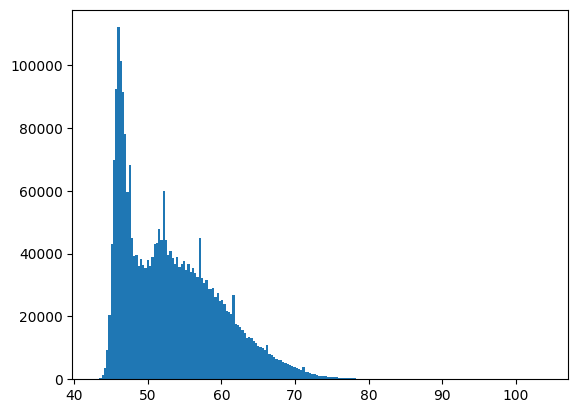

In [ ]:
plt.hist(naamsestraat62_clean['lamax'], bins = 200)
plt.show()

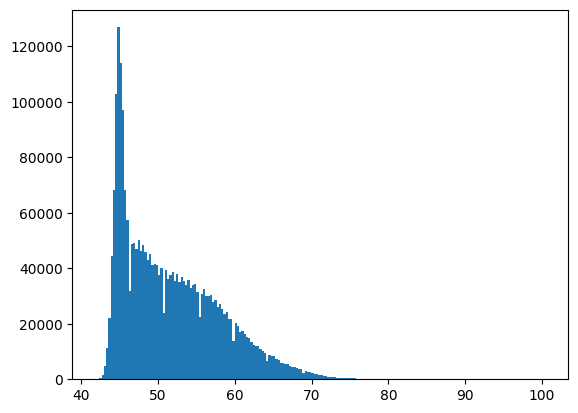

In [ ]:
plt.hist(naamsestraat62_clean['laeq'], bins = 200)
plt.show()

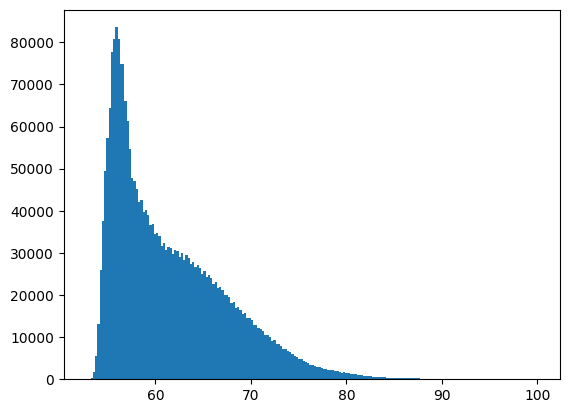

In [ ]:
plt.hist(naamsestraat62_clean['lceq'], bins = 200)
plt.show()

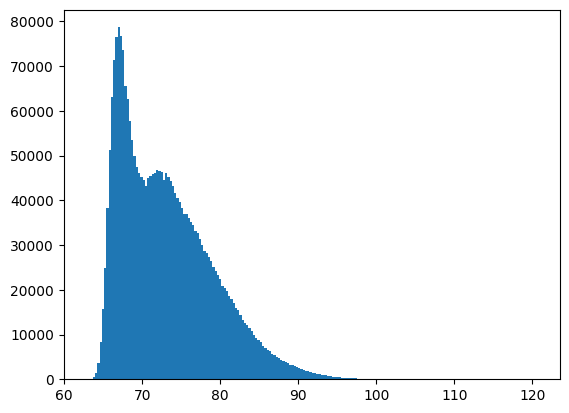

In [ ]:
plt.hist(naamsestraat62_clean['lcpeak'], bins = 200)
plt.show()

#Histogram - Calvariekapel

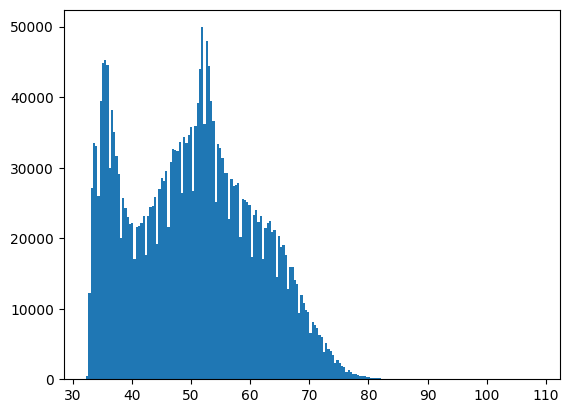

In [ ]:
plt.hist(calvariekapel['lamax'], bins = 200)
plt.show()

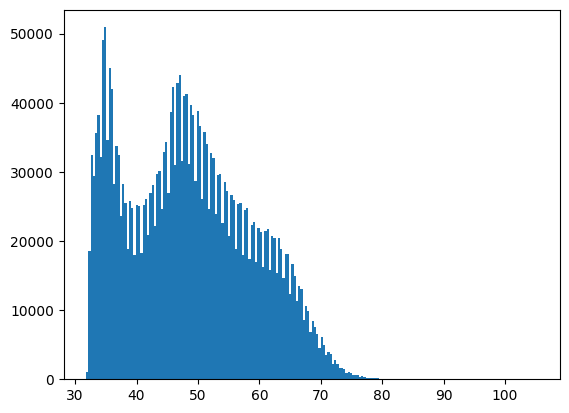

In [ ]:
plt.hist(calvariekapel['laeq'], bins = 200)
plt.show()

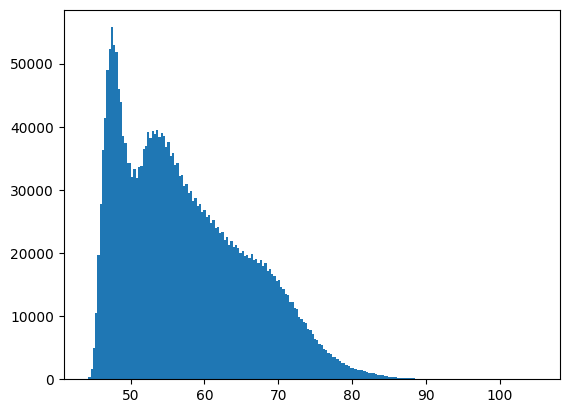

In [ ]:
plt.hist(calvariekapel['lceq'], bins = 200)
plt.show()

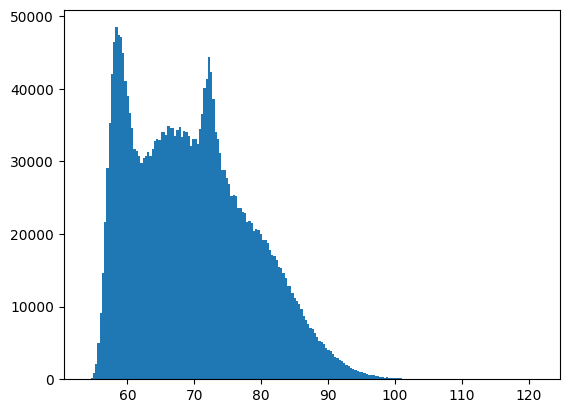

In [ ]:
plt.hist(calvariekapel['lcpeak'], bins = 200)
plt.show()

#Histogram - Paarkstraat2

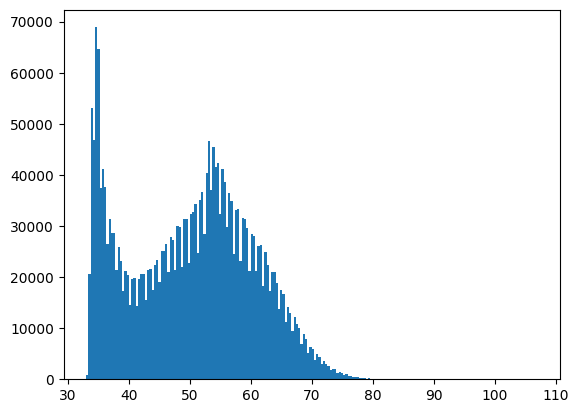

In [ ]:
plt.hist(paarkstraat2['lamax'], bins = 200)
plt.show()

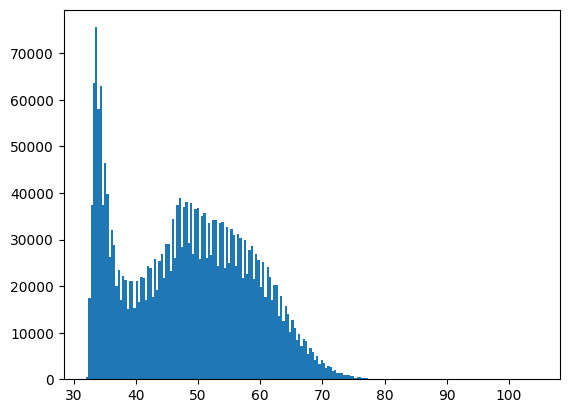

In [ ]:
plt.hist(paarkstraat2['laeq'], bins = 200)
plt.show()

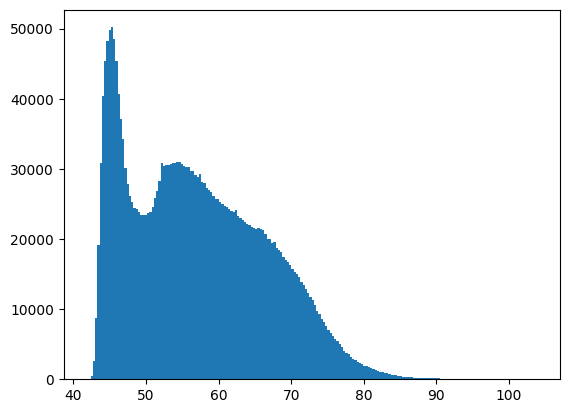

In [ ]:
plt.hist(paarkstraat2['lceq'], bins = 200)
plt.show()

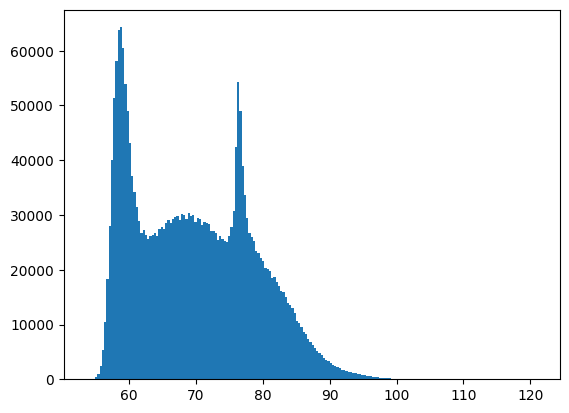

In [ ]:
plt.hist(paarkstraat2['lcpeak'], bins = 200)
plt.show()

#Histogram - Naamsestraat81

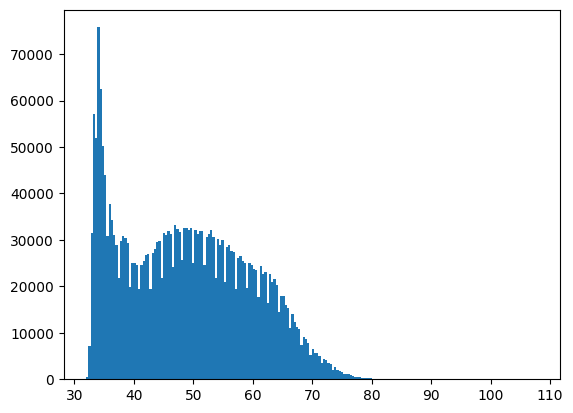

In [ ]:
plt.hist(naamsestraat81['lamax'], bins = 200)
plt.show()

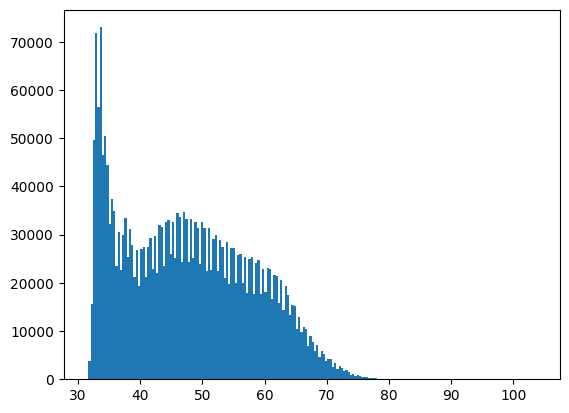

In [ ]:
plt.hist(naamsestraat81['laeq'], bins = 200)
plt.show()

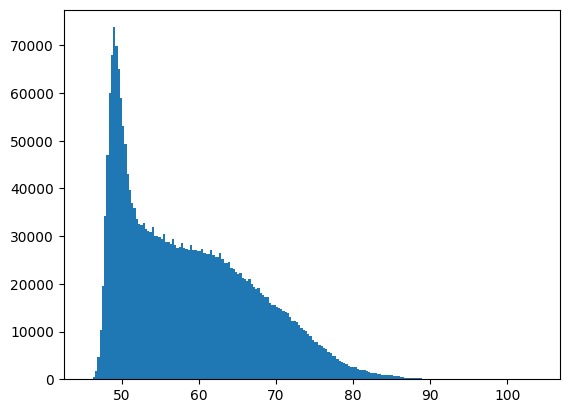

In [ ]:
plt.hist(naamsestraat81['lceq'], bins = 200)
plt.show()

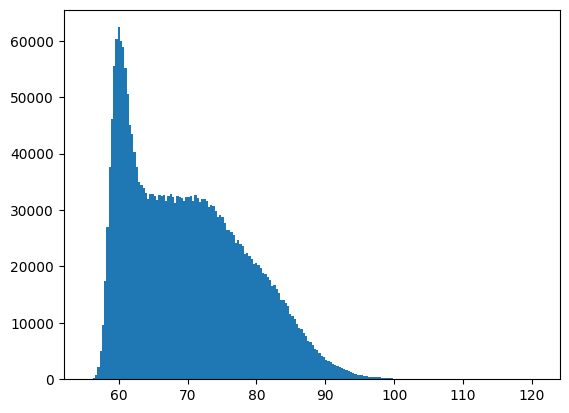

In [ ]:
plt.hist(naamsestraat81['lcpeak'], bins = 200)
plt.show()